### In this notebook, I've first tried to apply HOS to all channels, since always maternal is reconstructed here, I've substracted it from the original data hoping that I would end up with fetal components, then I applied HOS again to see if fetal component present. Unfortunately again only the maternal components


In [2]:
import functions
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from hosd_python.hosd import apply_hosd # library that I converted from MATLAB
from copy import deepcopy

In [3]:
no_ica_chans = 18
fs=1000
span = 10*fs
offset = 100*fs 
ms2s = lambda x, _:f'{x/1000:g}' 
window_size=int(1400) # used for higher-order-spectral filtering
time_axis=np.linspace(0,int(window_size)-1,num=int(window_size))

In [7]:

data = functions.array_from_TDMSgroup("patients/P044/P044_S01_D2024-04-18_G36.tdms", "R001")
copied_data = deepcopy(data)

In [ ]:
maternals = np.zeros_like(copied_data)
for channels in range(copied_data.shape[1]):
    beat, detect = apply_hosd(copied_data[:,channels], window_size) 
    maternals[:,channels] = detect

fetals = copied_data - maternals

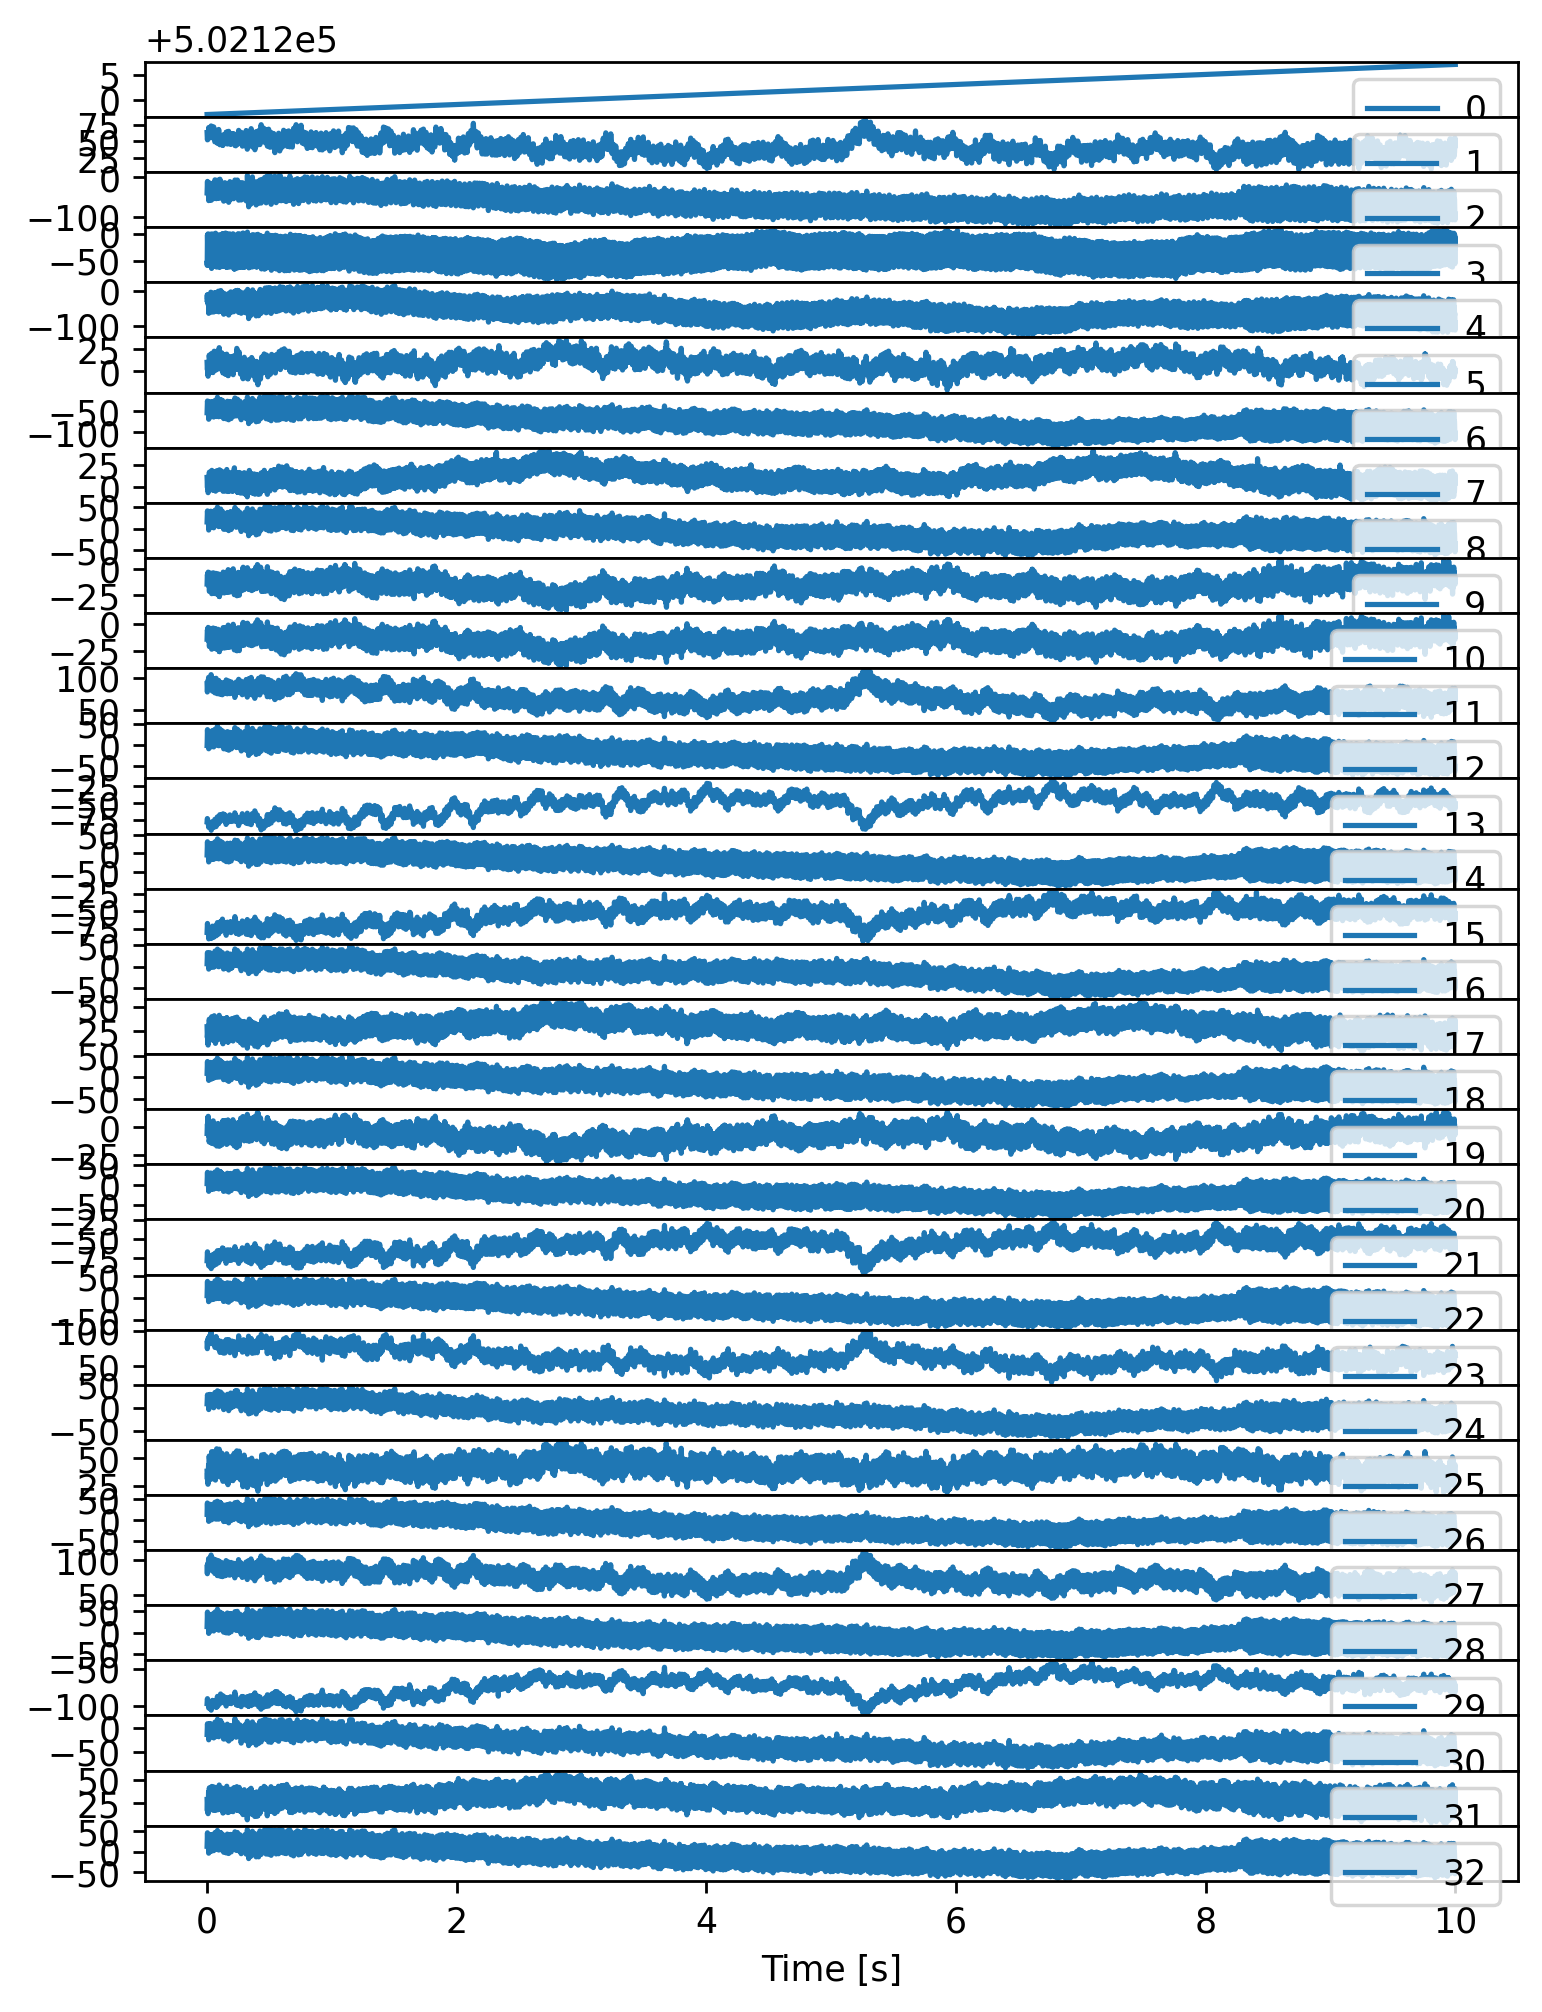

In [9]:
fig, ax = plt.subplots(fetals.shape[1], 1, sharex=True, figsize=(18 / 2.54, 24 / 2.54), dpi=250) #
fig.subplots_adjust(hspace=0)
    
for j in range(fetals.shape[1]):
    ax[j].plot(fetals[offset:(offset + span), j], label=str(j))
    ax[j].legend(loc=1)
ax[-1].xaxis.set_major_formatter(ms2s)
ax[-1].set_xlabel('Time [s]')
plt.show()

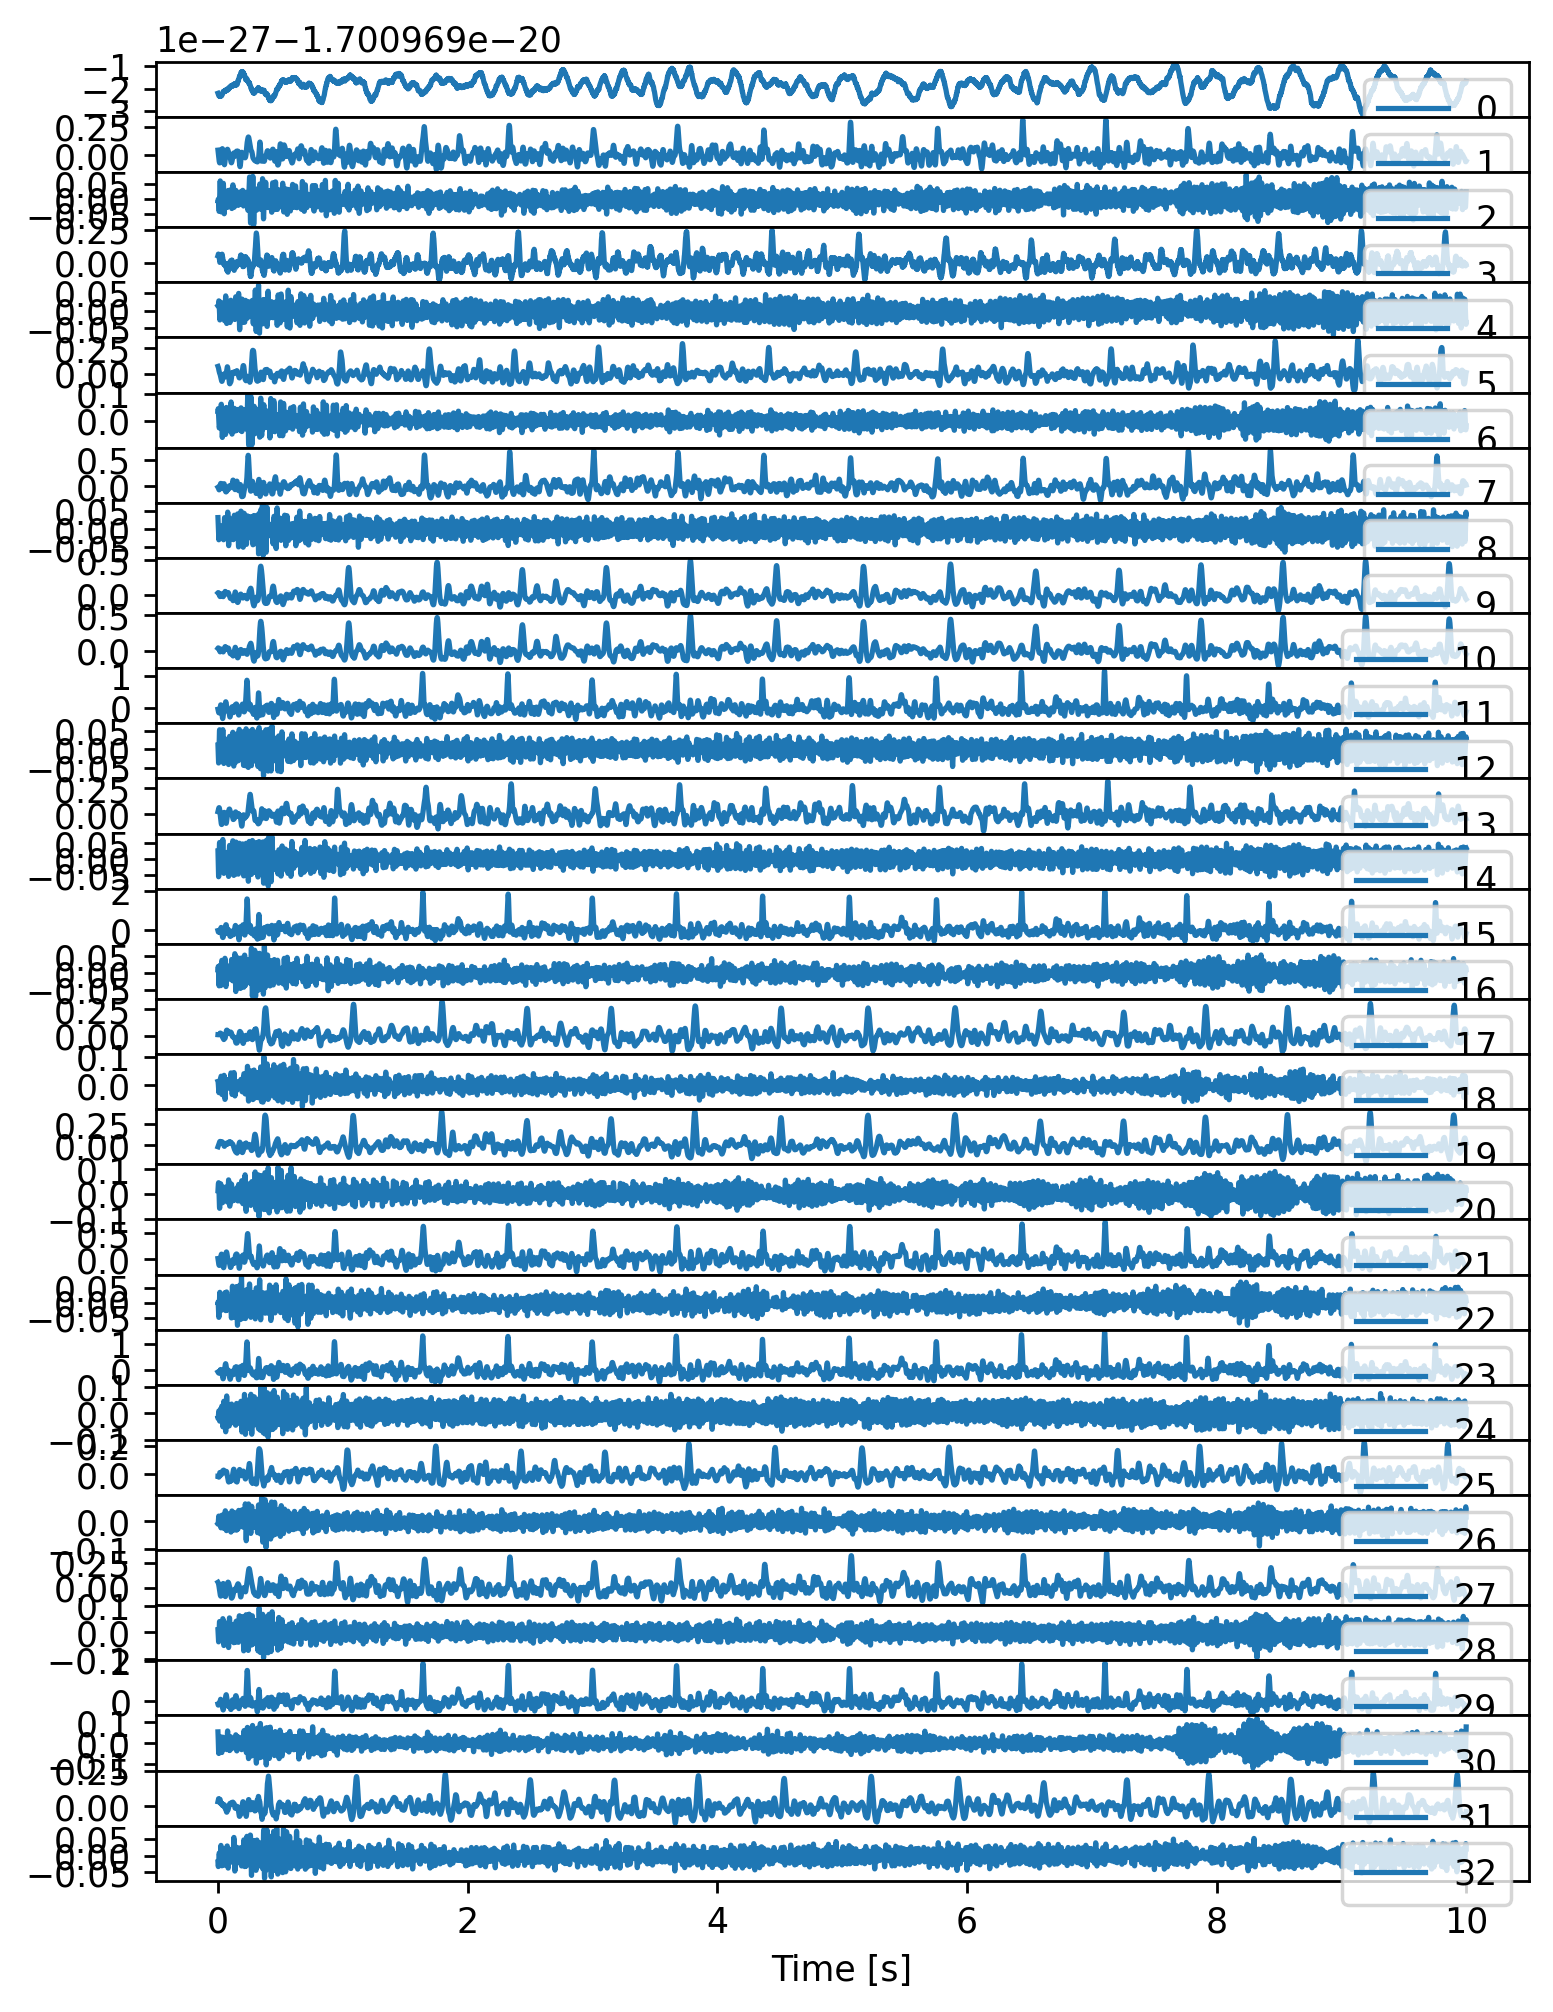

In [10]:
for channels in range(fetals.shape[1]):
    beat, detect = apply_hosd(fetals[:,channels], window_size) 
    fetals[:,channels] = detect

fig, ax = plt.subplots(fetals.shape[1], 1, sharex=True, figsize=(18 / 2.54, 24 / 2.54), dpi=250) #
fig.subplots_adjust(hspace=0)
    
for j in range(fetals.shape[1]):
    ax[j].plot(fetals[offset:(offset + span), j], label=str(j))
    ax[j].legend(loc=1)
ax[-1].xaxis.set_major_formatter(ms2s)
ax[-1].set_xlabel('Time [s]')
plt.show()   